In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_parquet('../data/final_dataset_v2.parquet')
df.head()

,index,county,date,daily_cases,daily_cases_by_population,daily_deaths,daily_deaths_by_population,POP2020,Partially Vaccinated,Fully Vaccinated,...,Number of ICU Beds By County,Number of ICU Beds Available By County,Total Beds By County per thousand ppl,Number of ICU Beds By County per thousand ppl,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,Albany,2020-03-26,171,0.000543,0,0.000000,314848,0.0,0.0,...,80.0,43.0,3.795482,0.254091,-51.0,-11.0,43.0,-53.0,-55.0,23.0
1,110535,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
2,110536,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
3,110537,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
4,110538,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0


In [18]:
df_sorted = df.copy()
df_sorted.drop(['index'], axis=1, inplace=True)
df_sorted = df.sort_values(by=['Facility Name','date']).set_index(['Facility Name','date'])
df_sorted.drop(['index'], axis=1, inplace=True)
df_sorted.head()


county  daily_cases  \
Facility Name              date                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26  Otsego            3   
                           2020-03-27  Otsego            5   
                           2020-03-28  Otsego            7   
                           2020-03-29  Otsego           10   
                           2020-03-30  Otsego           17   

                                       daily_cases_by_population  \
Facility Name              date                                    
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                   0.000051   
                           2020-03-27                   0.000085   
                           2020-03-28                   0.000120   
                           2020-03-29                   0.000171   
                           2020-03-30                   0.000290   

                                       daily_deaths  \
Facility Name              date                       
A.O. FOX MEMORIAL HOSPITAL 2020-03-26             0   
                           2020-03-27             0   
                           2020-03-28             1   
                           2020-03-29             1   
                           2020-03-30             1   

                                       daily_deaths_by_population  POP2020  \
Facility Name              date                                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                    0.000000    58524   
                           2020-03-27                    0.000000    58524   
                           2020-03-28                    0.000017    58524   
                           2020-03-29                    0.000017    58524   
                           2020-03-30                    0.000017    58524   

                                       Partially Vaccinated  Fully Vaccinated  \
Facility Name              date                                                 
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                   0.0               0.0   
                           2020-03-27                   0.0               0.0   
                           2020-03-28                   0.0               0.0   
                           2020-03-29                   0.0               0.0   
                           2020-03-30                   0.0               0.0   

                                       Non Vaccinated  \
Facility Name              date                         
A.O. FOX MEMORIAL HOSPITAL 2020-03-26             0.0   
                           2020-03-27             0.0   
                           2020-03-28             0.0   
                           2020-03-29             0.0   
                           2020-03-30             0.0   

                                       Partially Vaccinated per Population  \
Facility Name              date                                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                                  0.0   
                           2020-03-27                                  0.0   
                           2020-03-28                                  0.0   
                           2020-03-29                                  0.0   
                           2020-03-30                                  0.0   

                                       ...  Number of ICU Beds By County  \
Facility Name              date        ...                                 
A.O. FOX MEMORIAL HOSPITAL 2020-03-26  ...                          14.0   
                           2020-03-27  ...                          14.0   
                           2020-03-28  ...                          14.0   
                           2020-03-29  ...                          14.0   
                           2020-03-30  ...                          14.0   

                                       Number of ICU Beds Available By County  \
Facility Name              date                                  

In [38]:
# subset nov - feb

subset = df_sorted.copy()
subset['day_of_week'] = subset.index.get_level_values('date').dayofweek
subset['day_of_month'] = subset.index.get_level_values('date').day
subset['overload'] = subset['Number of Beds Available'] + \
    subset['Number of ICU Beds Available'] - subset['Patients Newly Admitted']

# diff column with difference between yesterday and day
diff_cols = []
for i in range(1, 4):
    subset.loc[:, 'overload_T-' +
               str(i)] = subset.groupby(level=0)['overload'].shift(i)
    subset.loc[:, 'overload_T-' +
               str(i) + '_diff'] = subset.groupby(level=0)['overload_T-'+str(i)].diff()
    diff_cols.append('overload_T-' +
                     str(i))
    diff_cols.append('overload_T-'+str(i) + '_diff')

# for col in ['Partially Vaccinated', 'Fully Vaccinated', 'Non Vaccinated']:
#     subset.loc[:, col+'_diff'] = subset.groupby(level=0)[col].diff()
#     # diff_cols.append(col)
#     diff_cols.append(col+'_diff')

# overload 7 day in future
subset.loc[:, 'overload-14day'] = subset.groupby(level=0)['overload'].shift(14)
# dropping NAs
subset = subset.dropna()

target = 'overload-14day'
cols = ['overload-14day', 'overload', *diff_cols, 'day_of_week', 'day_of_month',
        'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline']
subset = subset[cols]
# subset = subset[(subset.index.get_level_values('date') >= '2021-11-01') &
#                 (subset.index.get_level_values('date') <= '2022-01-31')]

subset_test = subset[(subset.index.get_level_values('date') > '2021-11-30')]
subset = subset[(subset.index.get_level_values('date') <= '2021-11-30')]

subset.tail(10)


# subset_train = subset[(subset.index.get_level_values('date') >= '2021-11-01') &
#                       (subset.index.get_level_values('date') <= '2022-01-31')]
# subset_test = subset[(subset.index.get_level_values('date') >= '2022-02-01') &
#                      (subset.index.get_level_values('date') <= '2022-02-28')]
# subset_train.shape, subset_test.shape


overload-14day  overload  \
Facility Name                     date                                   
WYOMING COUNTY COMMUNITY HOSPITAL 2021-11-21            -3.0      -1.0   
                                  2021-11-22             0.0      -2.0   
                                  2021-11-23            -4.0       2.0   
                                  2021-11-24            -1.0      -2.0   
                                  2021-11-25            -2.0      -2.0   
                                  2021-11-26            -1.0      -4.0   
                                  2021-11-27            -1.0      -2.0   
                                  2021-11-28            -4.0      -3.0   
                                  2021-11-29             0.0      -2.0   
                                  2021-11-30            -2.0      -5.0   

                                              overload_T-1  overload_T-1_diff  \
Facility Name                     date                                          
WYOMING COUNTY COMMUNITY HOSPITAL 2021-11-21           0.0                2.0   
                                  2021-11-22          -1.0               -1.0   
                                  2021-11-23          -2.0               -1.0   
                                  2021-11-24           2.0                4.0   
                                  2021-11-25          -2.0               -4.0   
                                  2021-11-26          -2.0                0.0   
                                  2021-11-27          -4.0               -2.0   
                                  2021-11-28          -2.0                2.0   
                                  2021-11-29          -3.0               -1.0   
                                  2021-11-30          -2.0                1.0   

                                              overload_T-2  overload_T-2_diff  \
Facility Name                     date                                          
WYOMING COUNTY COMMUNITY HOSPITAL 2021-11-21          -2.0               -1.0   
                                  2021-11-22           0.0                2.0   
                                  2021-11-23          -1.0               -1.0   
                                  2021-11-24          -2.0               -1.0   
                                  2021-11-25           2.0                4.0   
                                  2021-11-26          -2.0               -4.0   
                                  2021-11-27          -2.0                0.0   
                                  2021-11-28          -4.0               -2.0   
                                  2021-11-29          -2.0                2.0   
                                  2021-11-30          -3.0               -1.0   

                                              overload_T-3  overload_T-3_diff  \
Facility Name                     date                                          
WYOMING COUNTY COMMUNITY HOSPITAL 2021-11-21          -1.0                1.0   
                                  2021-11-22          -2.0               -1.0   
                                  2021-11-23           0.0                2.0   
                                  2021-11-24          -1.0               -1.0   
                                  2021-11-25          -2.0               -1.0   
                                  2021-11-26           2.0                4.0   
                                  2021-11-27          -2.0               -4.0   
                                  2021-11-28          -2.0                0.0   
                                  2021-11-29          -4.0               -2.0   
                                  2021-11-30          -2.0                2.0   

                                              day_of_week  day_of_month  \
Facility Name                     date                                    
WYOMING COUNTY COMMUNITY HOSPITAL 2021-11-21            6            21   
             

In [39]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    # print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [40]:
# !pip3 install xgboost

---------LR----------
LR: 0.841222 (0.059706)
---------XGB----------
XGB: 0.832923 (0.048885)
---------RF----------
RF: 0.817580 (0.054439)


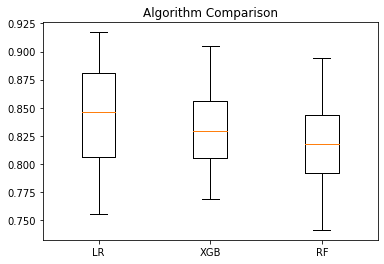

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

models = []
models.append(('LR', LinearRegression()))
# models.append(('NN', MLPRegressor(solver='lbfgs')))  # neural network
# models.append(('KNN', KNeighborsRegressor()))
models.append(('XGB', XGBRegressor()))
# Ensemble method - collection of many decision trees
models.append(('RF', RandomForestRegressor(n_estimators=10)))
# models.append(('SVR', SVR(gamma='auto')))  # kernel = linear

X_cols = ['date', 'Facility Name', *cols[1:]]
y_cols = target

# Evaluate each model in turn
results = []
names = []
feature_importances = {}
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=4)
    cv_results = []
    feature_importances[name] = []
    print(f"---------{name}----------")
    for train_index, test_index in tscv.split(subset):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = subset.iloc[train_index].stack(-1).reset_index().pivot_table(values=0, index=['Facility Name', 'date'],
                                                                                       columns='level_2').drop([target], axis=1), subset.iloc[test_index].stack(-1).reset_index().pivot_table(values=0, index=['Facility Name', 'date'], columns='level_2').drop([target], axis=1)
        y_train, y_test = subset.iloc[train_index].stack(-1).reset_index().pivot_table(values=0, index=[
            'Facility Name', 'date'], columns='level_2')[target], subset.iloc[test_index].stack(-1).reset_index().pivot_table(values=0, index=[
                'Facility Name', 'date'], columns='level_2')[target]
        # print(y_train)

        clf = model
        _ = clf.fit(X_train, y_train)
        feature_importances[name].append(_)

        preds = clf.predict(X_test)
        # accuracy for the current fold only
        r2score = clf.score(X_test, y_test)
        cv_results.append(r2score)
        # regression_results(y_test, preds)

    # cv_results = cross_val_score(
    #     model, X_train, y_train, cv=tscv, scoring='r2')
    cv_results = np.asarray(cv_results)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

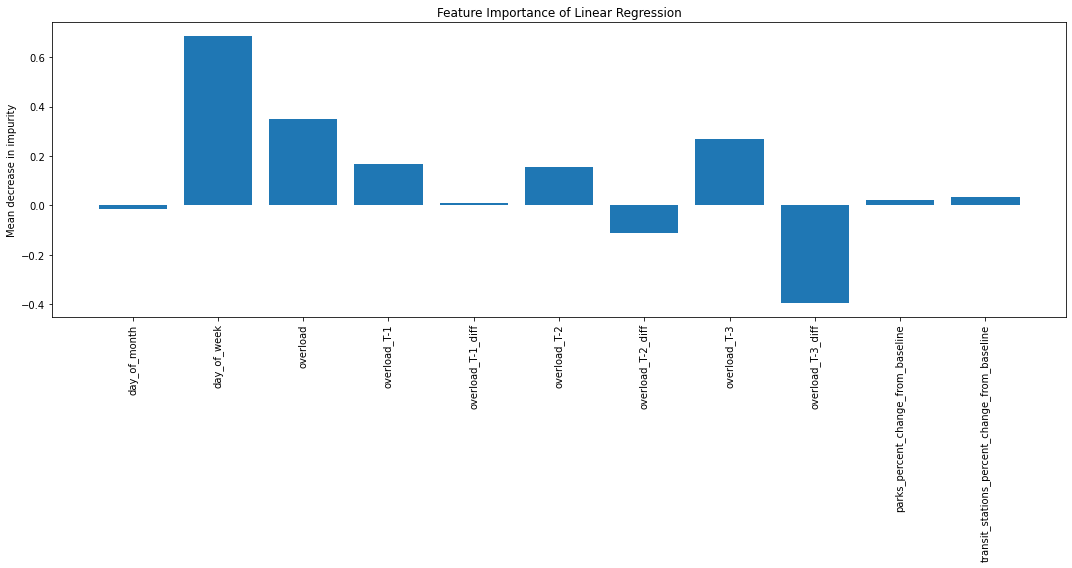

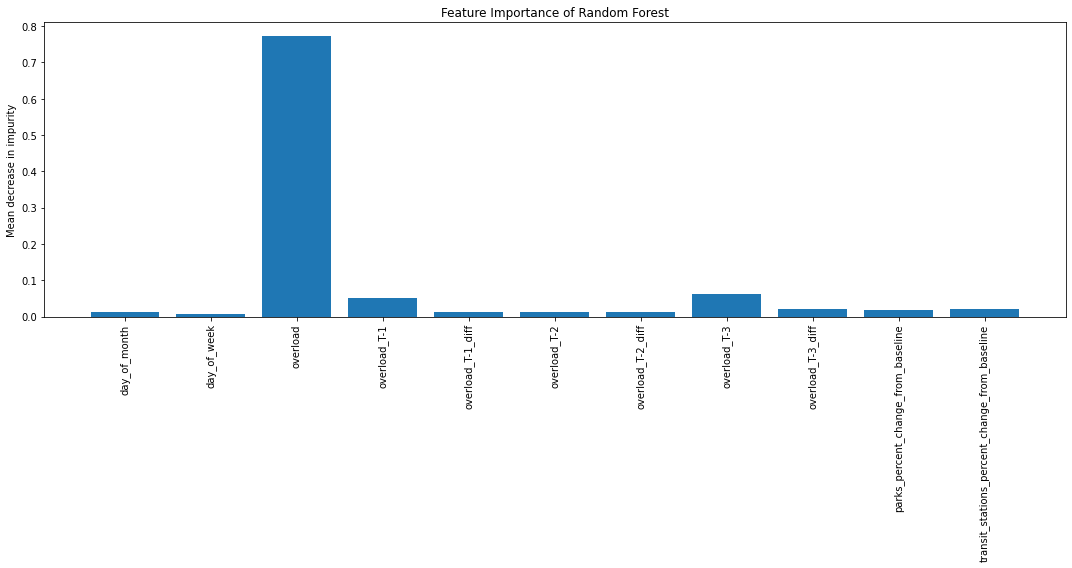

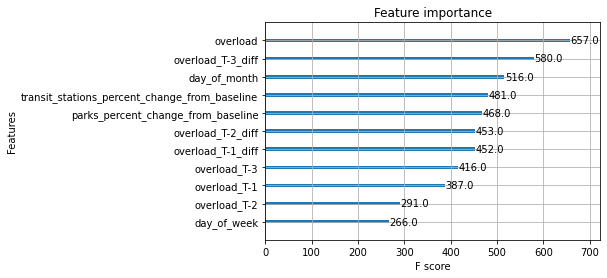

In [42]:
import importlib
import helper
import xgboost
importlib.reload(helper)
#Feature Importance of LR
_model = feature_importances['LR'][1]
helper.plot_feature_importance(_model, title="Feature Importance of Linear Regression")

#Feature Importance of RF
_model = feature_importances['RF'][1]
helper.plot_feature_importance(_model, title="Feature Importance of Random Forest")

f = _model.feature_names_in_
_model = feature_importances['XGB'][1]
# _model.get_booster().feature_names = f
xgboost.plot_importance(_model.get_booster())
# helper.plot_feature_importance(_model, title="Feature Importance of XGB", x_cols=f_cols)


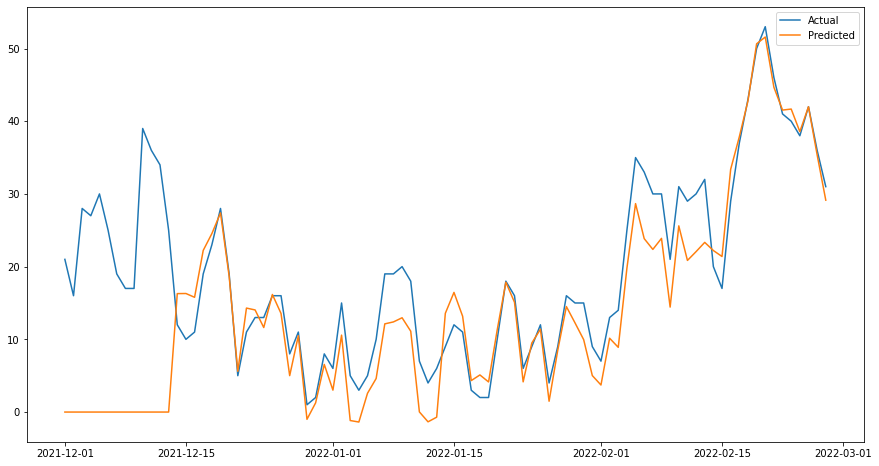

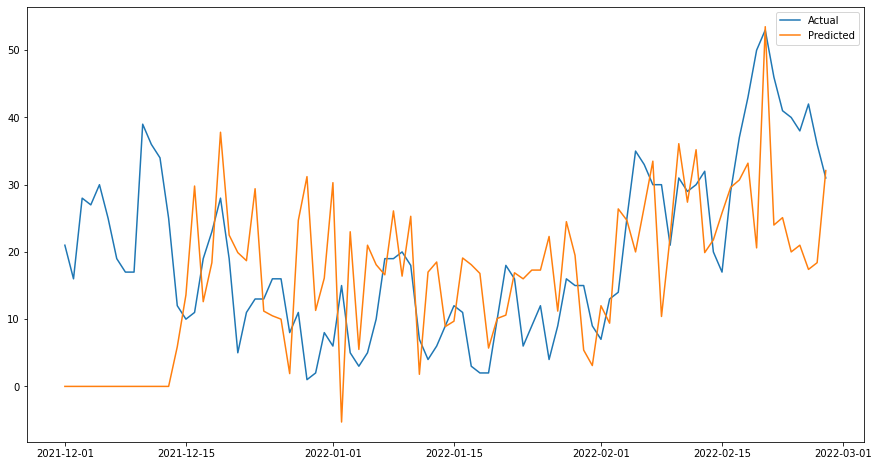

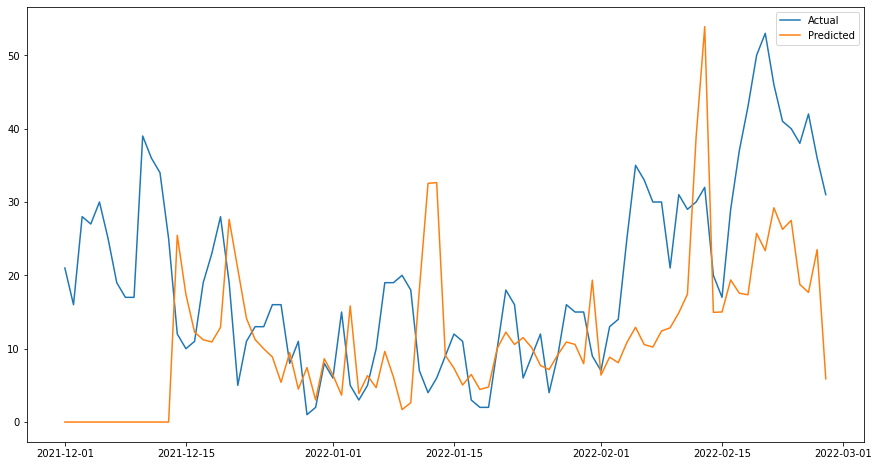

In [43]:
import matplotlib.pyplot as plt
model1 = feature_importances['LR'][1]
model2 = feature_importances['RF'][1]
model3 = feature_importances['XGB'][1]


def plot_predictions(model, analyse_hsp="AUBURN MEMORIAL HOSPITAL"):
    test_set = subset_test[subset_test.index.get_level_values(
        'Facility Name') == analyse_hsp]
    test_X = test_set.drop(target, axis=1)

    y_preds = model.predict(test_X)
    y_test = test_set[y_cols]

    x = [0]*13
    l = len(y_preds) - 13
    x += y_preds[:l].tolist()
    # len(x)

    # y_test.shape,y_preds.shape,
    # # print(y_test)
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(test_X.index.get_level_values('date'), y_test)
    ax.plot(test_X.index.get_level_values('date'), x)
    ax.legend(['Actual', 'Predicted'])
# # subset_test


plot_predictions(model1)
plot_predictions(model2)
plot_predictions(model3)


In [44]:
import importlib
import helper
importlib.reload(helper)
import warnings
warnings.filterwarnings('ignore')
helper.top_k_hsp_predction_loss(model1, subset_test, target, 10)


Loss Min:  15.995332955098563  | Loss Max:  13454.729814909755


[('STRONG MEMORIAL HOSPITAL', 1717.7235250948315),
 ('MONTEFIORE MEDICAL CENTER - HENRY AND LUCY MOSES DIV', 2046.734230482698),
 ('SOUTHSIDE HOSPITAL', 2115.908558390885),
 ('MAIMONIDES MEDICAL CENTER', 2352.961032470124),
 ('MEMORIAL HOSPITAL FOR CANCER AND ALLIED DISEASES', 2543.0739585323445),
 ('HOSPITAL FOR SPECIAL SURGERY', 2622.2118323196473),
 ('MOUNT SINAI HOSPITAL', 3489.025189777767),
 ('NYU LANGONE HOSPITALS', 4569.310747961047),
 ('UNIVERSITY HOSPITAL', 9304.270414755549),
 ('LONG ISLAND JEWISH MEDICAL CENTER', 13454.729814909755)]

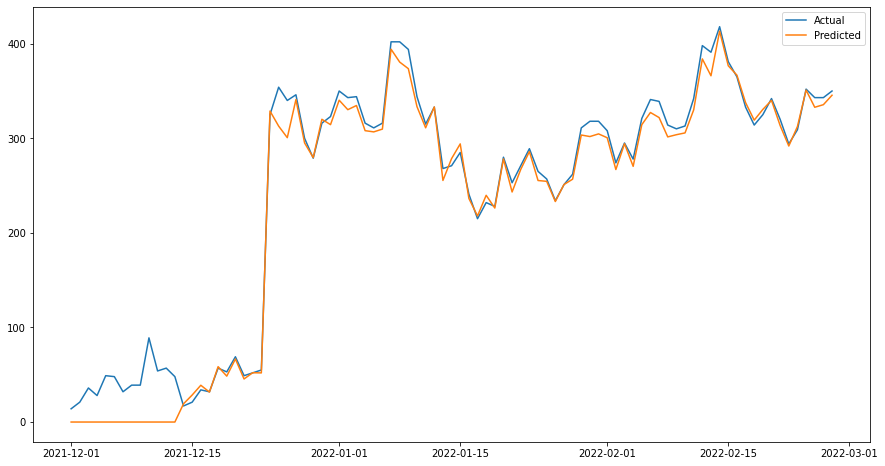

In [45]:
plot_predictions(model1,'LONG ISLAND JEWISH MEDICAL CENTER')

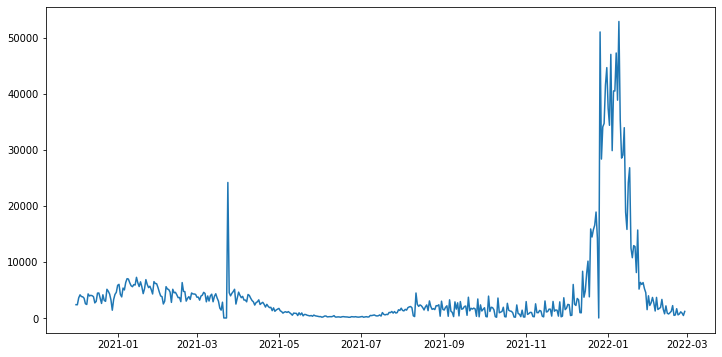

In [27]:
x = df_sorted.copy()
x.loc[:, 'daily_cases_diff'] = x.loc[:,'daily_cases'].diff()
x = x[(x.index.get_level_values('date') > '2020-11-30')]
x = x.dropna()
x = x[x.index.get_level_values('Facility Name') == 'LONG ISLAND JEWISH MEDICAL CENTER']

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x.index.get_level_values('date'), x['daily_cases_diff'])
# ax.plot(x.index.get_level_values('date'), x)


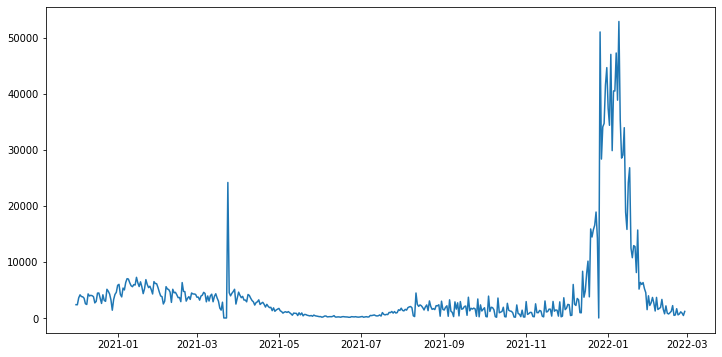

In [28]:
x = df_sorted.copy()
x = x[x.index.get_level_values('Facility Name') == 'LONG ISLAND JEWISH MEDICAL CENTER']
x.loc[:, 'daily_cases_diff'] = x.loc[:,'daily_cases'].diff()
x = x[(x.index.get_level_values('date') > '2020-11-30')]
x = x.dropna()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x.index.get_level_values('date'), x['daily_cases_diff'])

In [29]:
x = df_sorted.copy()
x.loc[:, 'daily_cases_diff'] = x.groupby(level=0)['Partially Vaccinated'].diff()
x[['daily_cases_diff','Partially Vaccinated']]

daily_cases_diff  \
Facility Name                     date                           
A.O. FOX MEMORIAL HOSPITAL        2020-03-26               NaN   
                                  2020-03-27               0.0   
                                  2020-03-28               0.0   
                                  2020-03-29               0.0   
                                  2020-03-30               0.0   
...                                                        ...   
WYOMING COUNTY COMMUNITY HOSPITAL 2022-02-23               5.0   
                                  2022-02-24               3.0   
                                  2022-02-25               2.0   
                                  2022-02-26               6.0   
                                  2022-02-27               0.0   

                                              Partially Vaccinated  
Facility Name                     date                              
A.O. FOX MEMORIAL HOSPITAL        2020-03-26                   0.0  
                                  2020-03-27                   0.0  
                                  2020-03-28                   0.0  
                                  2020-03-29                   0.0  
                                  2020-03-30                   0.0  
...                                                            ...  
WYOMING COUNTY COMMUNITY HOSPITAL 2022-02-23               23009.0  
                                  2022-02-24               23012.0  
                                  2022-02-25               23014.0  
                                  2022-02-26               23020.0  
                                  2022-02-27               23020.0  

[133760 rows x 2 columns]